In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#model import
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [11]:
df=pd.read_csv('/home/venkata/Downloads/firstproj/Mlproject/notebook/data/stud.csv')

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
x=df.drop(columns=['math_score'],axis=1)

In [24]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [13]:
y=df['math_score']

In [14]:
cat_fea=x.select_dtypes(include='object').columns
num_fea=x.select_dtypes(exclude='object').columns

In [26]:
cat_fea

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [27]:
num_fea

Index(['reading_score', 'writing_score'], dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_trans=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",num_trans,num_fea),
    ("StandardScaler",oh_trans,cat_fea),
])


In [16]:
x=preprocessor.fit_transform(x)

In [31]:
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [1]:
def evaluate_model(true,predict):
    mse=mean_squared_error(true,predict)
    mae=mean_absolute_error(true,predict)
    rmse=root_mean_squared_error(true,predict)
    r2=r2_score(true,predict)

    return mse,mae,rmse,r2



In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [4]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "SVR":SVR(),
    "XGBoost":XGBRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "kNeighbour":KNeighborsRegressor()
}

In [22]:
models_list=[]
r2_scr=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)



    #make_predictions

    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)


    mse,mae,rmse,r2=evaluate_model(y_train,train_pred)

    mse1,mae1,rmse1,r2_1=evaluate_model(y_test,test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    r2_scr.append(r2_1)

    
    print("-----------------------")
    print("Evaluation of the model training:")
    
    print("mean_squared_error",mse)
    print("mean_absolute_error",mae)
    print("root_mean_squared_error",rmse)
    print("r2 score",r2)

    print("------------------------------")
    print("Evaluation of the model testing:")

    print("mean_squared_error",mse1)
    print("mean_absolute_error",mae1)
    print("root_mean_squared_error",rmse1)
    print("r2 score",r2_1)

    print("="*35)

LinearRegression
-----------------------
Evaluation of the model training:
mean_squared_error 29.182727557099852
mean_absolute_error 4.306072084585962
root_mean_squared_error 5.402103993547315
r2 score 0.8771057074462547
------------------------------
Evaluation of the model testing:
mean_squared_error 26.54776978307881
mean_absolute_error 4.132791379043607
root_mean_squared_error 5.152452792901533
r2 score 0.871328209052863
Lasso
-----------------------
Evaluation of the model training:
mean_squared_error 44.52769471702485
mean_absolute_error 5.3024417285473415
root_mean_squared_error 6.672907515995171
r2 score 0.8124849868611208
------------------------------
Evaluation of the model testing:
mean_squared_error 40.18926627873001
mean_absolute_error 4.886322037327753
root_mean_squared_error 6.339500475489375
r2 score 0.8052105728206354
Ridge
-----------------------
Evaluation of the model training:
mean_squared_error 29.186445416898497
mean_absolute_error 4.305027163969093
root_mean_sq

In [31]:
pd.DataFrame(list(zip(models_list,r2_scr)),columns=["models","score"]).sort_values(by=["score"],ascending=False)

,models,score
2,Ridge,0.871754
0,LinearRegression,0.871328
8,CatBoostRegressor,0.860535
6,GradientBoost,0.860376
7,RandomForestRegressor,0.839496
5,AdaBoost,0.816990
3,SVR,0.812863
1,Lasso,0.805211
4,XGBoost,0.801878
9,kNeighbour,0.798393


In [32]:
reg=LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

Text(0, 0.5, 'predicted')

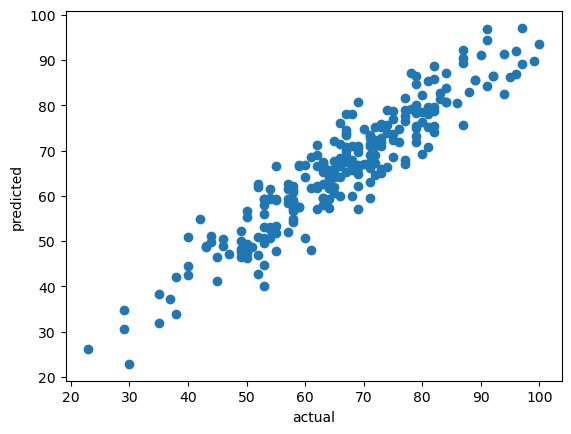

In [33]:
plt.scatter(y_test,pred)
plt.xlabel("actual")
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

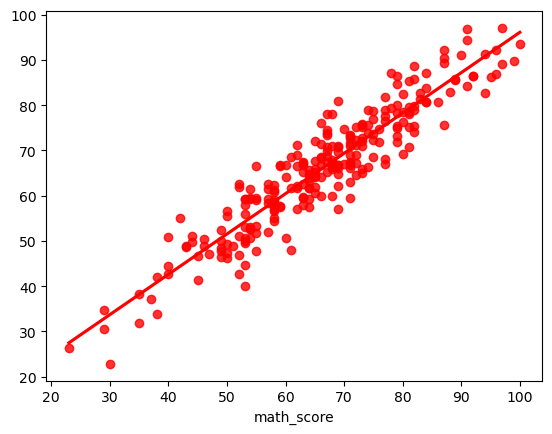

In [36]:
import seaborn as sns
sns.regplot(x=y_test,y=pred,ci=None,color="red")
